In [ ]:
!pip install networkx pandas

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load the Edge Data to Create the Graph
def load_graph_from_edges(file_path):
    """
    Load a directed graph from the edge CSV file.
    :param file_path: Path to the CSV file containing edges.
    :return: A directed graph (NetworkX DiGraph).
    """
    data = pd.read_csv(file_path)  # Load edge data into a DataFrame
    G = nx.DiGraph()  # Create an empty directed graph
    for _, row in data.iterrows():  # Iterate over each row (edge)
        G.add_edge(row['from'], row['to'])  # Add directed edges (from 'from' to 'to')
    return G


In [ ]:
# Step 2: Define the Propagation Probability Function
def propagation_probability(u, f):
    """
    Example propagation probability function.
    Can be customized based on data.
    :param u: User (follower).
    :param f: User being followed.
    :return: Propagation probability.
    """
    return 0.1  # Fixed probability for simplicity


In [ ]:
# Step 3: TunkRank Algorithm
def tunk_rank(G, propagation_probability, epsilon=1e-6):
    """
    Compute TunkRank scores for all users in the graph.
    :param G: Directed graph (NetworkX DiGraph).
    :param propagation_probability: Function to calculate propagation probability.
    :param epsilon: Convergence threshold.
    :return: Dictionary with user TunkRank scores.
    """
    T = {node: 0 for node in G.nodes()}  # Initialize scores

    converge = False
    while not converge:
        converge = True
        new_T = T.copy()
        for u in G.nodes():
            score = 0
            for f in G.predecessors(u):  # Followers are predecessors in the graph
                P_f_u = propagation_probability(f, u)
                score += P_f_u * (1 + T[f])
            if abs(score - T[u]) > epsilon:
                converge = False
            new_T[u] = score
        T = new_T

    return T


In [ ]:
# Step 4: Visualize the Graph
def plot_graph(G):
    """
    Visualize the graph structure.
    :param G: NetworkX directed graph.
    """
    plt.figure(figsize=(10, 8))  # Set figure size
    pos = nx.spring_layout(G)  # Generate positions for nodes
    nx.draw(
        G, pos, with_labels=True, node_size=3000, node_color="lightblue",
        font_size=10, font_weight="bold", edge_color="gray", arrowsize=20
    )
    plt.title("Graph Connectivity", fontsize=16)
    plt.show()


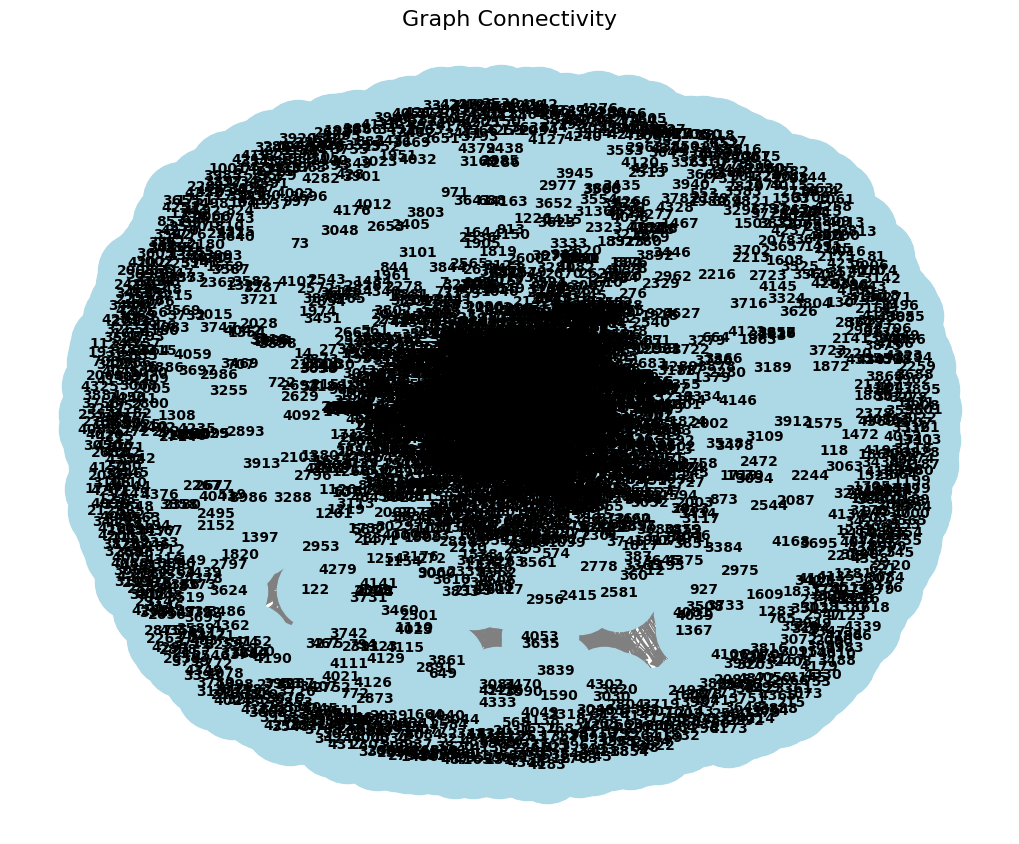

TunkRank Scores:
0: 0
646: 13.991749909499392
2510: 210.25100477374124
2425: 2996.7750795877314
2596: 70.63279242471008
85: 0.1
1725: 72.49124662787683
208: 1561.6449783344538
1302: 7.353413449247904
3534: 709.457690002483
57: 0.30000000000000004
3948: 2216.7408109687453
297: 1.3871686
1800: 189.75769956085497
2767: 74.83671698821978
251: 6.787107049375682
907: 20.963062514280274
598: 8.907275100257998
1786: 16.82760978518136
1860: 17.962953365599237
3294: 309.65051624928026
1: 0
3633: 290.8908923777939
2535: 217.0716626192724
6: 0.1
1866: 0.1
1276: 25.81969546311668
2589: 56.57095754716552
4082: 272.5023548666211
571: 0.30000000000000004
2: 0
3480: 126.92647060802668
1165: 174.82029278904335
648: 2.1450293189499394
1560: 9.840343827842304
367: 1.3584084600000002
2879: 0.6910232460000001
344: 0.981476
1477: 5.082042609993886
2567: 47.48822352911963
2832: 125.14657273655747
2777: 400.01346955314983
2578: 44.5079756416957
568: 6.5581176092
3665: 279.4250305050879
1348: 33.10073695694642


In [ ]:
# Step 5: Load Edge Data, Create Graph, Run TunkRank
edge_file_path = "/content/musae_RU_edges.csv"  # Update this if the file name is different
target_file_path = "/content/musae_RU_target.csv"  # Update this if needed

# Load edge data to create graph
G = load_graph_from_edges(edge_file_path)

# Plot the graph
plot_graph(G)

# Run TunkRank on the graph
influence_scores = tunk_rank(G, propagation_probability)

# Print TunkRank scores
print("TunkRank Scores:")
for user, score in influence_scores.items():
    print(f"{user}: {score}")


Top 25 Nodes by TunkRank Score:
4313: 0.014192729187812756
2425: 0.010848501107705449
4337: 0.00828413799924813
1199: 0.007957564902743509
4338: 0.007906940202179694
3743: 0.0071669855294104355
208: 0.007122456484673047
3653: 0.0070404974144493175
3948: 0.0068893430003092344
1749: 0.006785353110180527
4277: 0.005960741121433554
3972: 0.005438047516585635
3981: 0.00506868360872337
4285: 0.005040393014893792
3237: 0.0048897411905364134
1800: 0.0047707951411416856
4169: 0.0045087821505740595
3534: 0.004251659789533672
3316: 0.004235094106586252
4328: 0.004158338857312995
3973: 0.004031159033223688
4121: 0.003839625132609433
3184: 0.0038117051959229518
3369: 0.0037989340282102374
4151: 0.0035107199980370235


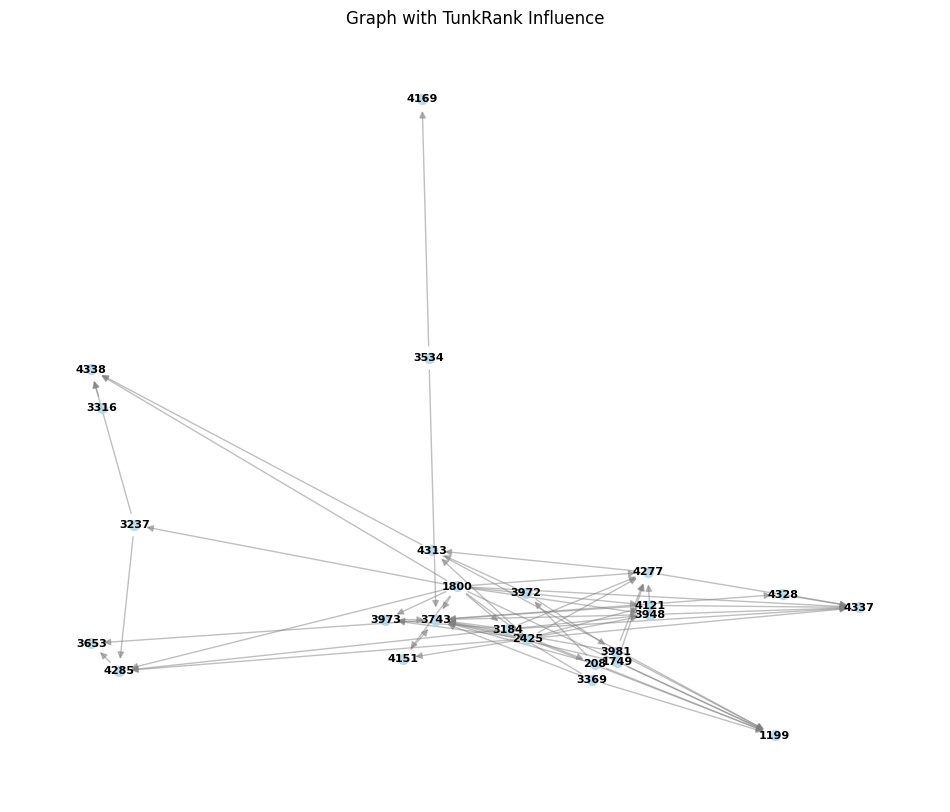

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Function to load graph from edge data
def load_graph_from_edges(edge_file_path):
    edges = pd.read_csv(edge_file_path)
    G = nx.DiGraph()  # Directed graph
    for _, row in edges.iterrows():
        G.add_edge(row['from'], row['to'])  # Add directed edge
    return G

# Function to run TunkRank (PageRank) on the graph
def tunk_rank(G, alpha=0.85):
    return nx.pagerank(G, alpha=alpha)

# Function to plot the graph
def plot_graph(G, pos=None):
    if pos is None:
        pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 10))
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color='lightblue', alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
    plt.title("Graph with TunkRank Influence")
    plt.axis('off')
    plt.show()

# Step 5: Load Edge Data, Create Graph, Run TunkRank
edge_file_path = "/content/musae_RU_edges.csv"  # Update this if the file name is different
target_file_path = "/content/musae_RU_target.csv"  # Update this if needed

# Load edge data to create graph
G = load_graph_from_edges(edge_file_path)

# Run TunkRank on the graph
influence_scores = tunk_rank(G)

# Step 6: Sort nodes by TunkRank score and select top 25
sorted_nodes = sorted(influence_scores.items(), key=lambda item: item[1], reverse=True)
top_25_nodes = sorted_nodes[:25]

# Extract the subgraph containing only the top 25 nodes
top_25_node_ids = [node for node, _ in top_25_nodes]
subgraph = G.subgraph(top_25_node_ids)

# Print the TunkRank scores of the top 25 nodes
print("Top 25 Nodes by TunkRank Score:")
for user, score in top_25_nodes:
    print(f"{user}: {score}")

# Plot the subgraph of the top 25 nodes
plot_graph(subgraph)
